In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [29]:
import cufflinks as cf
cf.go_offline()

In [30]:
df['age'].iplot(kind='hist',bins=100,color='green')

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<AxesSubplot:>

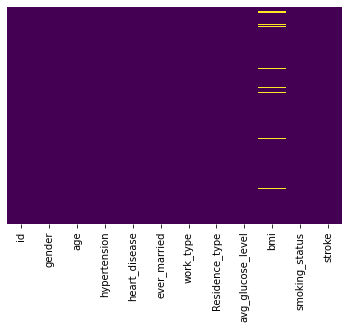

In [5]:
sns.heatmap(data= df.isnull(),yticklabels=False,cbar= False,cmap='viridis') #checking for missing values

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

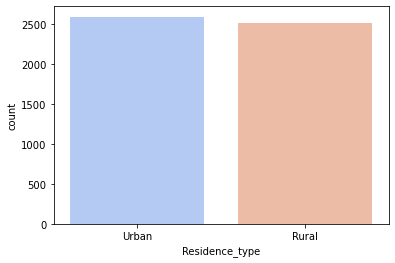

In [6]:
sns.countplot(x='Residence_type', data= df, palette='coolwarm')

<AxesSubplot:xlabel='stroke', ylabel='count'>

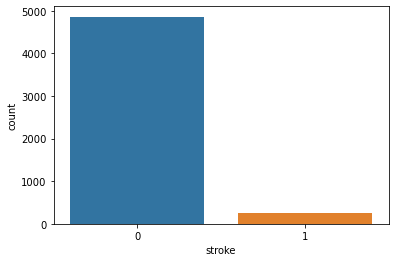

In [7]:
sns.countplot(x='stroke', data= df)

In [8]:
df.fillna(value= df['bmi'].mean(),inplace=True)

In [9]:
df.drop('id',axis= 1 ,inplace = True) #Since id column is not significant for machine learning

In [10]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [11]:
sex = pd.get_dummies(df['gender'],drop_first=True)
married = pd.get_dummies(df['ever_married'],drop_first=True)
job = pd.get_dummies(df['work_type'],drop_first=True)
area = pd.get_dummies(df['Residence_type'],drop_first=True)

In [12]:
df.drop(['gender','ever_married','work_type','Residence_type'], axis=1, inplace= True)

In [13]:
df1=pd.concat([df,sex,married, job, area], axis=1)

In [14]:
df1.drop(['Other'],axis=1,inplace=True)

In [15]:
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Male,Yes,Never_worked,Private,Self-employed,children,Urban
0,67.0,0,1,228.69,36.600000,formerly smoked,1,1,1,0,1,0,0,1
1,61.0,0,0,202.21,28.893237,never smoked,1,0,1,0,0,1,0,0
2,80.0,0,1,105.92,32.500000,never smoked,1,1,1,0,1,0,0,0
3,49.0,0,0,171.23,34.400000,smokes,1,0,1,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,never smoked,1,0,1,0,0,1,0,0


In [16]:
smoke=pd.get_dummies(df['smoking_status'],drop_first=True)

In [17]:
df1.drop(['smoking_status'], axis=1, inplace= True)

In [18]:
df1=pd.concat([df1,smoke], axis=1)

## Import ML lib

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, precision_recall_curve
from sklearn.metrics import f1_score, auc, roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

C:\Users\prath\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Standardization of values

In [20]:
col = ['age', 'avg_glucose_level', 'bmi']
std=StandardScaler()
df1[col] = std.fit_transform(df[col])

In [21]:
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,1.051434,0,1,2.706375,1.001234e+00,1,1,1,0,1,0,0,1,1,0,0
1,0.786070,0,0,2.121559,1.384666e-15,1,0,1,0,0,1,0,0,0,1,0
2,1.626390,0,1,-0.005028,4.685773e-01,1,1,1,0,1,0,0,0,0,1,0
3,0.255342,0,0,1.437358,7.154182e-01,1,0,1,0,1,0,0,1,0,0,1
4,1.582163,1,0,1.501184,-6.357112e-01,1,0,1,0,0,1,0,0,0,1,0


In [22]:
# Initiate X and y
X= df1.drop('stroke',axis=1)
y=df1['stroke']

### Imbalance dataset using smote optimizer

In [23]:
sm = SMOTE()
X_bal, y_bal = sm.fit_sample(X, y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, 
                                                    y_bal, test_size=0.25)

### Creating the logistic regression model

In [25]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
predictions = logmodel.predict(X_test)

In [27]:
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [28]:
print(confusion_matrix(y_test,predictions))

[[ 899  323]
 [ 171 1038]]


In [29]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.74      0.78      1222
          1       0.76      0.86      0.81      1209

avg / total       0.80      0.80      0.80      2431



In [30]:

print('Precision Score: ', precision_score(y_test,predictions))
print('Recall Score: ', recall_score(y_test,predictions))
print('F1 Score: ', f1_score(y_test,predictions))
print('Accuracy Score: ', accuracy_score(y_test,predictions))
print('ROC AUC: ', roc_auc_score(y_test,predictions))

Precision Score:  0.7626745040411462
Recall Score:  0.858560794044665
F1 Score:  0.8077821011673152
Accuracy Score:  0.7967914438502673
ROC AUC:  0.7971200042236418


In [31]:
lr_score = accuracy_score(y_test,predictions)
lr_score

0.7967914438502673

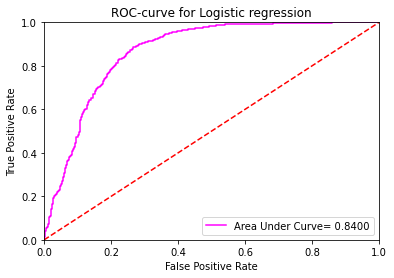

In [111]:
#Plotting ROC- AUC curve:

rand_probs = [0 for i in range(len(y_test))]
lr_probs = logmodel.predict_proba(X_test)

#consider only Positive probabilities
lr_probs= lr_probs[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.title('ROC-curve for Logistic regression')
plt.plot(lr_fpr, lr_tpr, 'magenta', label = 'Area Under Curve= %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### FN is very high. In our cases ,we have to predict the stroke which is crucial.

## Decision Trees

We'll start just by training a single decision tree.

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
pred = dtree.predict(X_test)

In [36]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.92      0.91      0.92      1222
          1       0.91      0.92      0.91      1209

avg / total       0.91      0.91      0.91      2431



In [37]:
print(confusion_matrix(y_test,pred))

[[1116  106]
 [ 101 1108]]


In [38]:

print('Precision Score: ', precision_score(y_test,pred))
print('Recall Score: ', recall_score(y_test,pred))
print('F1 Score: ', f1_score(y_test,pred))
print('Accuracy Score: ', accuracy_score(y_test,pred))
print('ROC AUC: ', roc_auc_score(y_test,pred))

Precision Score:  0.9126853377265239
Recall Score:  0.9164598842018197
F1 Score:  0.9145687164671894
Accuracy Score:  0.9148498560263266
ROC AUC:  0.9148584200059835


In [39]:
dtree_score = accuracy_score(y_test,pred)
dtree_score

0.9148498560263266

In [112]:
#Plotting ROC- AUC curve:
rand_probs = [0 for i in range(len(y_test))]
dtree_probs = dtree.predict_proba(X_test)

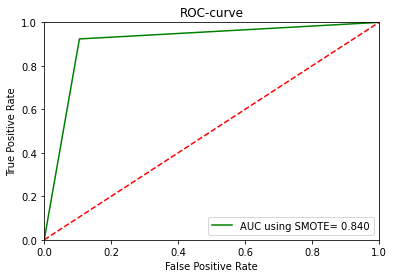

In [113]:

#consider only Positive probabilities
dtree_probs= dtree_probs[:,1]

dtree_fpr, dtree_tpr, _ = roc_curve(y_test, dtree_probs)
plt.title('ROC-curve')
plt.plot(dtree_fpr, dtree_tpr, 'g', label = 'AUC using SMOTE= %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Creating the Random Forests Classifier

Now let's compare the decision tree model to a random forest.

In [40]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
rfc_pred = rfc.predict(X_test)

In [42]:
print(confusion_matrix(y_test,rfc_pred))

[[1162   60]
 [  33 1176]]


In [43]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96      1222
          1       0.95      0.97      0.96      1209

avg / total       0.96      0.96      0.96      2431



In [44]:

print('Precision Score: ', precision_score(y_test,rfc_pred))
print('Recall Score: ', recall_score(y_test,rfc_pred))
print('F1 Score: ', f1_score(y_test,rfc_pred))
print('Accuracy Score: ', accuracy_score(y_test,rfc_pred))
print('ROC AUC: ', roc_auc_score(y_test,rfc_pred))

Precision Score:  0.9514563106796117
Recall Score:  0.9727047146401985
F1 Score:  0.9619631901840492
Accuracy Score:  0.9617441382147265
ROC AUC:  0.9618024391531598


In [53]:
rfc_score = accuracy_score(y_test,rfc_pred)
rfc_score

0.9617441382147265

### Creating the Support Vector Classifier model

In [45]:
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
predictions = svc.predict(X_test)

In [48]:
print(confusion_matrix(y_test,predictions))

[[ 896  326]
 [ 101 1108]]


In [49]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.90      0.73      0.81      1222
          1       0.77      0.92      0.84      1209

avg / total       0.84      0.82      0.82      2431



### Performing hyper parameter tuning

In [72]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8745372274784039, total=   2.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8592592592592593, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8732510288065843, total=   2.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7984368572603867, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7868312757201646, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7962962962962963, total=   1.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7869189633895516, total=   1.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7691358024691358, total=   1.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.7843621399176954, total=   1.9s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7732510288065844, total=   1.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7909465020576132, total=   1.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9514603044014809, total=   0.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9518518518518518, total=   0.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9506172839506173, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9197860962566845, total=   3.5s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9234567901234568, total=   3.3s
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [73]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [74]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
grid_predictions = grid.predict(X_test)

In [76]:
print(confusion_matrix(y_test,grid_predictions))

[[1151   71]
 [  10 1199]]


In [77]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.99      0.94      0.97      1222
          1       0.94      0.99      0.97      1209

avg / total       0.97      0.97      0.97      2431



In [50]:
# Using original SVC model:
print('Precision Score: ', precision_score(y_test,predictions))
print('Recall Score: ', recall_score(y_test,predictions))
print('F1 Score: ', f1_score(y_test,predictions))
print('Accuracy Score: ', accuracy_score(y_test,predictions))
print('ROC AUC: ', roc_auc_score(y_test,predictions))

Precision Score:  0.7726638772663877
Recall Score:  0.9164598842018197
F1 Score:  0.8384411653424139
Accuracy Score:  0.8243521184697655
ROC AUC:  0.8248420533938722


In [51]:
svm_score = accuracy_score(y_test,predictions)
svm_score

0.8243521184697655

In [78]:
# Using hyper-tuning of the parameters SVC model:
print('Precision Score: ', precision_score(y_test,grid_predictions))
print('Recall Score: ', recall_score(y_test,grid_predictions))
print('F1 Score: ', f1_score(y_test,grid_predictions))
print('Accuracy Score: ', accuracy_score(y_test,grid_predictions))
print('ROC AUC: ', roc_auc_score(y_test,grid_predictions))

Precision Score:  0.9440944881889763
Recall Score:  0.9917287014061208
F1 Score:  0.9673255344897136
Accuracy Score:  0.9666803784450844
ROC AUC:  0.9668136142055154


### Model Comparision

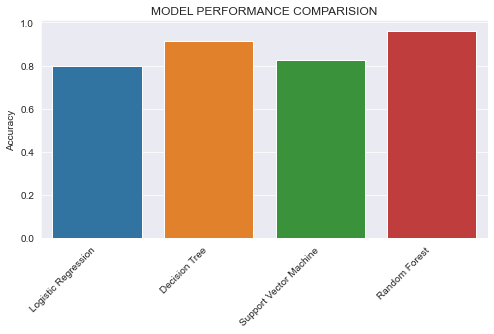

In [71]:
models= ['Logistic Regression','Decision Tree','Support Vector Machine','Random Forest']
perform= [lr_score, dtree_score, svm_score, rfc_score]

fig,ax= plt.subplots(figsize=(8,4))
sns.set_style("darkgrid")
sns.barplot(x=models, 
            y=perform)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45, 
                   horizontalalignment='right')
ax.set_ylabel("Accuracy")
ax.set_title("MODEL PERFORMANCE COMPARISION")
plt.show()

## END ###